# Finding the best chocolate bars

Now let's now move on to the competition and challenge.

## 📖 Background
You work at a specialty foods import company that wants to expand into gourmet chocolate bars. Your boss needs your team to research this market to inform your initial approach to potential suppliers.

After finding valuable chocolate bar ratings online, you need to explore if the chocolate bars with the highest ratings share any characteristics that could help you narrow your search for suppliers (e.g., cacao percentage, bean country of origin, etc.)

## 💾 The data

#### Your team created a file with the following information ([source](https://flavorsofcacao.com)):
- "id" - id number of the review
- "manufacturer" - Name of the bar manufacturer
- "company_location" - Location of the manufacturer
- "year_reviewed" - From 2006 to 2021
- "bean_origin" - Country of origin of the cacao beans
- "bar_name" - Name of the chocolate bar
- "cocoa_percent" - Cocoa content of the bar (%)
- "num_ingredients" - Number of ingredients
- "ingredients" - B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, (Sa) Salt
- "review" - Summary of most memorable characteristics of the chocolate bar
- "rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding

***Acknowledgments**: Brady Brelinski, Manhattan Chocolate Society*

## 💪 Challenge
Create a report to summarize your research. Include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? 
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
7. Summarize your findings.

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6

df = pd.read_csv('chocolate_bars.csv')
df

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25


Let's answer first question and calculate avg rating per country (bean_origin). Sort by rating in descending order to see best countries:

In [248]:
avg_rating = df.groupby("bean_origin").agg({"rating":"mean"}).round(3).sort_values("rating", ascending=False).reset_index()
avg_rating

,bean_origin,rating
0,Tobago,3.625
1,China,3.500
2,Sao Tome & Principe,3.500
3,Solomon Islands,3.450
4,Congo,3.318
...,...,...
57,Sierra Leone,2.750
58,St.Vincent-Grenadines,2.750
59,Principe,2.750
60,Martinique,2.750


Now we must find reviews count in every country. Do same steps as before - group by country and apply agg function:

In [249]:
reviews_count = df.groupby("bean_origin").agg({"bar_name":"nunique"}).sort_values("bar_name", ascending=False).reset_index().rename(columns={"bar_name":"bars_count"})
reviews_count

,bean_origin,bars_count
0,Peru,154
1,Venezuela,149
2,Blend,140
3,Dominican Republic,121
4,Ecuador,120
...,...,...
57,Martinique,1
58,Gabon,1
59,Principe,1
60,Burma,1


And visualize both tables. Each has 62 rows so we can't single out every country. This means that histogram is the best choice:

(None, None)

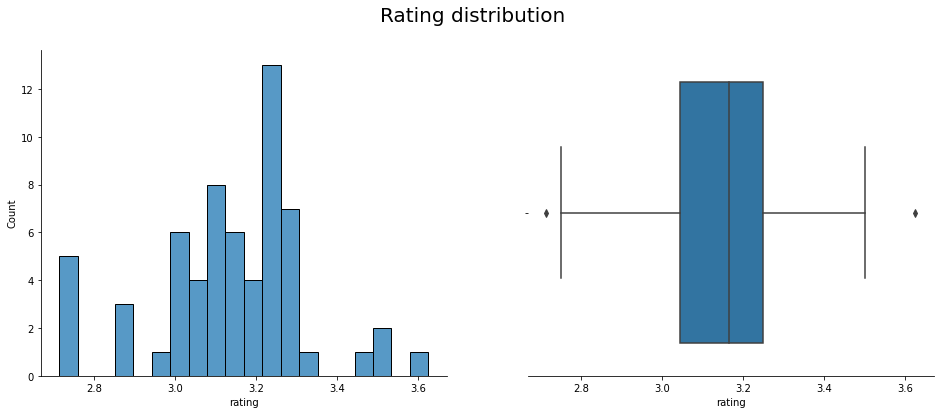

In [250]:
f, axis = plt.subplots(1, 2)
sns.histplot(avg_rating, x="rating", bins=20, ax=axis[0])
sns.boxplot(data=avg_rating, x="rating", ax=axis[1])
f.suptitle("Rating distribution", fontsize = 20)
sns.despine(ax=axis[0]), sns.despine(ax=axis[1], left=True)


Most bars get a score between 3.05 and 3.25 points. 5 bars rated for a very low score, less than 2.8

(None, None)

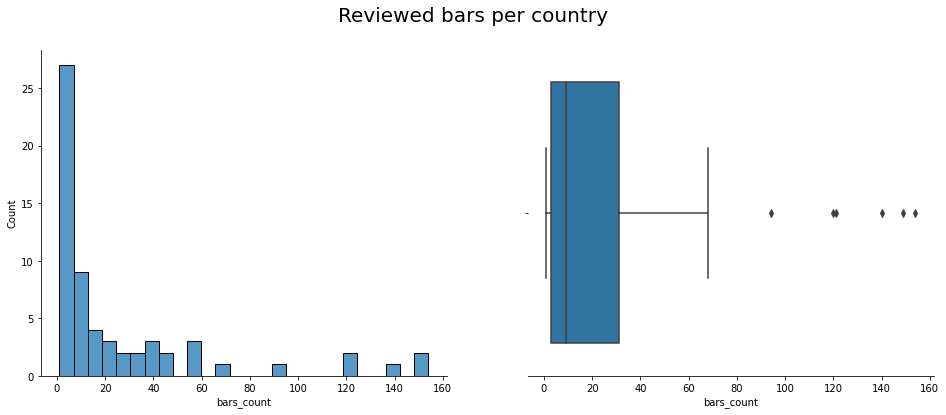

In [251]:
f, axis = plt.subplots(1, 2)
sns.histplot(reviews_count, x="bars_count", bins=26, ax=axis[0])
sns.boxplot(data=reviews_count, x="bars_count", ax=axis[1])
f.suptitle("Reviewed bars per country", fontsize = 20)
sns.despine(ax=axis[0]), sns.despine(ax=axis[1], left=True)

In more than 50% countries, 10 or fewer unique bars were rated. A lot of different bars were rated in 6 countries:

In [252]:
reviews_count["bean_origin"].head(6)

0                  Peru
1             Venezuela
2                 Blend
3    Dominican Republic
4               Ecuador
5            Madagascar
Name: bean_origin, dtype: object

Anwer the question: Is the cacao bean's origin an indicator of quality? In table "avg_rating" we can see different countries has totally different average rating. But this may be caused by a random error due to the high variance. Let's draw confidence intervals using a boxplots.

<AxesSubplot:xlabel='rating', ylabel='bean_origin'>

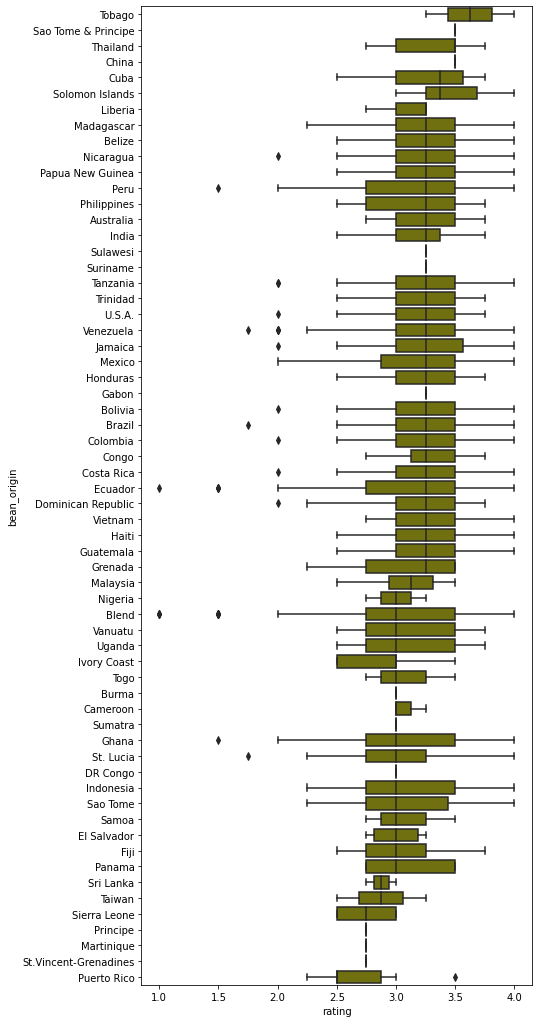

In [253]:
plt.figure(figsize=(7, 18))
sns.boxplot(data=df, x="rating", y="bean_origin",
            order=df.groupby("bean_origin", as_index=False).agg({"rating":"median"}).sort_values("rating", ascending=False)["bean_origin"].values,
            color="olive")

Most countries do not differentiate between each other. Just few values has very high or very low median rating. We need to conduct a statistical test to accept or reject the hypothesis. Our distribution is abnormal, and we should use the Kruskal-Wallis criteria. At a significance level of 0.05 , we will test two hypotheses:  
*H0 - there is no relationship between the country of origin of beans and the rating*  
*H1 - rating depends on the country of origin of the beans*  

In [254]:
samples = [df[df.bean_origin == country]["rating"] for country in df["bean_origin"].unique()]
ss.kruskal(*samples)

KruskalResult(statistic=74.90080734628437, pvalue=0.10874186831887003)

p - value > α, and we can't reject null hypotesis.  
**It means that cacao bean's origin is not inicator of quality**.

Next question we can ask: "What is the average cocoa content for bars with higher ratings (above 3.5)?" Just remove values with rating less than 3,5 and find average for remaining.

In [255]:
print("Average cocoa percent in best bars is", str(df.query("rating > 3.5")["cocoa_percent"].mean().round(2))+"%")

Average cocoa percent in best bars is 70.95%


Now let's look at the relationship between rating and cocoa percent. Use Pearson correlation.

In [256]:
corr, p_value = ss.pearsonr(df["cocoa_percent"], df["rating"])
print(f"Correlation between cocoa percent and bar rating is {round(corr, 3)}. \np-value = {round(p_value, 5)}")

Correlation between cocoa percent and bar rating is -0.147. 
p-value = 0.0


This is a low level of correlation, but it is statistically significant. May be we have a nonlinear correlation? Draw a scatter plot:

<AxesSubplot:xlabel='rating', ylabel='cocoa_percent'>

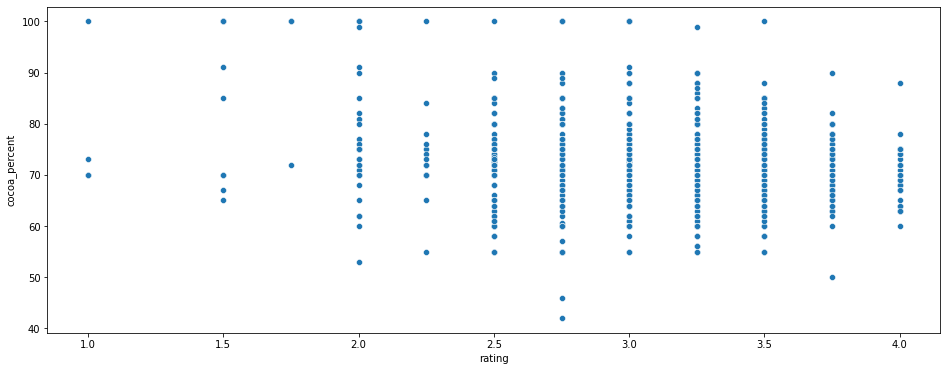

In [257]:
sns.scatterplot(data=df, x="rating", y="cocoa_percent")

We can't see correlation here. Yes, with decrease of cocoa percentage, our rating increases little, but it looks like an accident. Let's divide the rating into groups and compare the averages.

In [258]:
df.assign(intervals = pd.cut(df["rating"], bins=[2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4])).groupby("intervals").agg({"cocoa_percent":["mean", "median"]})

cocoa_percent       
                     mean median
intervals                       
(2.0, 2.25]     73.294118   72.0
(2.25, 2.5]     71.671687   70.5
(2.5, 2.75]     72.099099   71.0
(2.75, 3.0]     71.738050   70.0
(3.0, 3.25]     71.431034   70.0
(3.25, 3.5]     71.225664   70.0
(3.5, 3.75]     71.041667   70.0
(3.75, 4.0]     70.696429   70.0

Here we go again...  
Mean value really decreases with increasing of cocoa percent, but median doesn't changes. I think we can't say anything about the correlation with such results.

Now we should compare average rating between bars with lecithin and bars without it. Divide our bars into two groups - with L and without L:

In [259]:
lecithin_filter = df.dropna().assign(have_L = df["ingredients"].str.contains("L"))[["rating", "have_L"]]
lecithin_filter.groupby("have_L").agg({"rating":["mean", "median"]})

rating       
            mean median
have_L                 
False   3.225128   3.25
True    3.150609   3.25

The medians are equal, and the averages differ quite a bit. Probably there is no statistical difference between the groups, but let's check it using the Mann–Whitney U test:

In [215]:
#Use sampling to equalize the number of observations in both groups

s1 = pd.DataFrame(columns=["p_value"])
for i in range(10000):
    s, p_value = ss.mannwhitneyu(lecithin_filter.query("have_L == False")["rating"].sample(n=493), lecithin_filter.query("have_L == True")["rating"])
    s1.loc[len(s1)] = p_value
(s1["p_value"] <= 0.05).value_counts()

True     6202
False    3798
Name: p_value, dtype: int64

<AxesSubplot:xlabel='have_L', ylabel='rating'>

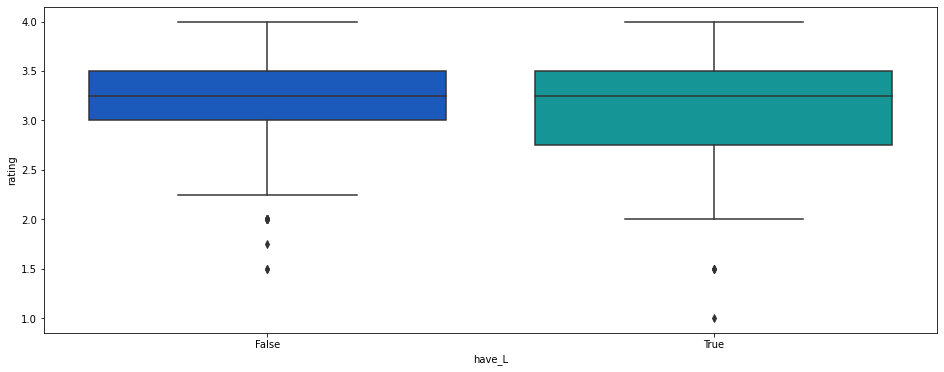

In [260]:
sns.boxplot(data=lecithin_filter, x="have_L", y="rating", palette="winter")

In 38% tests p_value was > 0.05 and we can conclude that lecithin does not affect on rating of bars.

##### As a result, we saw that the bean's origin country doesn't affect on rating of the bar. Next, the less cocoa in chocolate, the higher it is rated on average. Perhaps this is due to the fact that bitter chocolate is not as pleasant as milky. Also, the lecithin does not affect on the rating level. Although if you don't use statistical criteria, the conclusions will be the opposite and false.